In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

df=pd.read_csv("student.csv", sep=";")

(array([ 38.,   0.,   8.,  24.,  60., 103.,  62.,  60.,  22.,  18.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

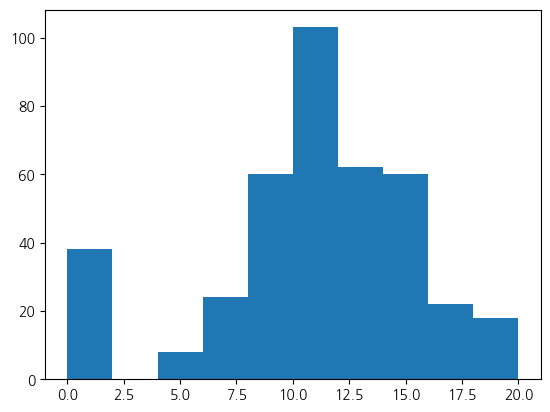

In [265]:
plt.hist(df["G3"]) # 이런...양아치들이 있었다
# 0점인 학생과 아닌 학생을 분리하면, 정확도가 더 높아질 것 같다! 

In [266]:
df_0=df[df["G3"]==0] # 성적이 0점인 학생들은 따로 분리
df=df[df["G3"]!=0] # 기존의 df변수는 0점인 학생들을 제외하고 저장

In [267]:
# 문자 형식의 열은 삭제
for i in df.columns:
    if df[i].dtype == "object": # 컬럼의 타입이 "Object"이면,
        df.drop(i, axis=1, inplace=True)

In [268]:
df.reset_index(drop=True, inplace=True)

In [269]:
# 이상값 제거
import scipy.stats as stats 
z = np.abs(stats.zscore(df)) 
index,_=np.where(z>2.5)

In [270]:
# 이상치를 심하게 웃도는 데이터 제거 
df.drop(index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [271]:
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [272]:
med=df[df.columns[:13]]
strr="+".join(med)
strr

'age+Medu+Fedu+traveltime+studytime+failures+famrel+freetime+goout+Dalc+Walc+health+absences'

In [273]:
# ols 분석 시행하여 유의미한 변수를 찾음
import statsmodels.formula.api as smf 
formula = f'G3 ~ {strr}'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.737
Date:                Thu, 29 Feb 2024   Prob (F-statistic):            0.00113
Time:                        20:18:56   Log-Likelihood:                -752.16
No. Observations:                 300   AIC:                             1532.
Df Residuals:                     286   BIC:                             1584.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2983      2.975      4.470      0.000       7.442      19.154
age           -0.1319      0.167     -0.791      0.429      -0.460       0.196
Medu           0.5820      0.212      2.749      0.006       0.165       0.999
Fedu           0.0417      0.206      0.202      0.840      -0.365       0.448
traveltime    -0.1115      0.311     -0.358      0.721      -0.724       0.501
studytime      0.2029      0.231      0.879      0.380      -0.252       0.657
failures      -0.4329      0.624     -0.694      0.488      -1.660       0.795
famrel         0.1045      0.234      0.447      0.655      -0.356       0.565
freetime       0.1939      0.187      1.038      0.300      -0.174       0.562
goout         -0.4135      0.191     -2.162      0.031      -0.790      -0.037
Dalc          -0.0910      0.379     -0.240      0.810      -0.837       0.655
Walc          -0.0104      0.204     -0.051      0.959      -0.411       0.390
health        -0.1646      0.130     -1.270      0.205      -0.420       0.091
absences      -0.0693      0.035     -2.003      0.046      -0.137      -0.001
==============================================================================
Omnibus:                        2.303   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                2.086
Skew:                           0.114   Prob(JB):                        0.352
Kurtosis:                       2.660   Cond. No.                         332.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
np.abs(df.corr()["G3"]).sort_values()

freetime      0.025340
health        0.058288
traveltime    0.065291
famrel        0.066035
Dalc          0.076599
studytime     0.079444
Walc          0.120006
Fedu          0.136787
age           0.136894
goout         0.137101
failures      0.155888
absences      0.161322
Medu          0.212431
G1            0.888753
G2            0.968069
G3            1.000000
Name: G3, dtype: float64

In [275]:
from sklearn.model_selection import train_test_split 
feature=df[["Medu","absences","failures","goout"]]
target=df["G3"]

In [276]:
x_train, x_test, y_train, y_test = train_test_split(feature, 
                                                    target, 
                                                    test_size=0.2)

In [277]:
from sklearn.preprocessing import StandardScaler     
from sklearn.preprocessing import MinMaxScaler     
from sklearn.preprocessing import RobustScaler     
from sklearn.preprocessing import SplineTransformer     
from sklearn.preprocessing import QuantileTransformer   

std_s=StandardScaler()
x_train_std=std_s.fit_transform(x_train)
std_s=StandardScaler()
x_test_std=std_s.fit_transform(x_test)

mm_s=MinMaxScaler()
x_train_mm=mm_s.fit_transform(x_train)
mm_s=MinMaxScaler()
x_test_mm=mm_s.fit_transform(x_test)

ro_s=RobustScaler()
x_train_ro=ro_s.fit_transform(x_train)
ro_s=RobustScaler()
x_test_ro=ro_s.fit_transform(x_test)

sq_s=SplineTransformer()
x_train_sq=sq_s.fit_transform(x_train)
sq_s=SplineTransformer()
x_test_sq=sq_s.fit_transform(x_test)

qt_s=QuantileTransformer(n_quantiles=100)
x_train_qt=qt_s.fit_transform(x_train)
qt_s=QuantileTransformer(n_quantiles=100)
x_test_qt=qt_s.fit_transform(x_test)



c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (100) is greater than the total number of samples (60). n_quantiles is set to n_samples.
  warnings.warn(


In [278]:
x_data=[x_train_std,x_test_std,x_train_mm,x_test_mm,x_train_ro,x_test_ro,x_train_sq,x_test_sq,x_train_qt,x_test_qt]
len(x_data) # 2X5=10개의 X 데이터 셋 마련 

10

In [279]:
from sklearn.neighbors import KNeighborsClassifier         
from sklearn.ensemble import RandomForestRegressor     
from sklearn.svm import SVR     
from sklearn.linear_model import LogisticRegression     
from sklearn.neighbors import KNeighborsRegressor     
from sklearn.linear_model import LinearRegression        
from sklearn.multiclass import OneVsRestClassifier     
from sklearn.multiclass import OneVsOneClassifier        
from sklearn.metrics import mean_squared_error     
from sklearn.metrics import mean_absolute_error     
from sklearn.metrics import r2_score       
from sklearn.metrics import accuracy_score     
from sklearn.metrics import precision_score     
from sklearn.metrics import recall_score     
from sklearn.metrics import f1_score     
from sklearn.metrics import confusion_matrix     
from sklearn.metrics import classification_report 

model_list=[KNeighborsClassifier(), 
            LogisticRegression(), # 여기까지는 분류 측정 지표 계산 가능
            RandomForestRegressor(),
            SVR(),
            KNeighborsRegressor(),
            LinearRegression()] 
#OvO_list=[OneVsRestClassifier(),OneVsOneClassifier()]

score_dict=dict()

for i in range(0,10,2) : 
    for n in range(1,20):
        for m in ['uniform','distance']:
            for s in ['auto','ball_tree','kd_tree','brute']:
                model=KNeighborsClassifier(n_neighbors=n,weights=m,algorithm=s)
                model.fit(x_data[i], y_train)
                train_score=model.score(x_data[i], y_train)                # (1) train_score  
                test_score=model.score(x_data[i+1], y_test)                # (2) test_score  
                score_dict.setdefault((i,n,m,s),test_score)
                
    
    
    

In [285]:
max(score_dict.values())
#score_df=pd.DataFrame(score_dict)
#score_df#.columns=["StandardScaler","MinMaxScaler","RobustScaler","SplineTransformer ","QuantileTransformer"]

0.21666666666666667

In [286]:
# 21.6%? 흐하하하....정신이 나갈 것 같다
# 이제 로지스틱 회귀와 OvOmodel을 사용해서 해보자 

In [298]:
score_dict=dict()
for n in ["l1","l2","elasticnet",None]:
    for m in ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']:
        for s in ['auto','ovr','multinomial']:
            print(n,m,s)
            try :
                model=LogisticRegression(max_iter=10000, solver=m, multi_class=s,penalty=n)
                model.fit(x_data[0], y_train)
                train_score=model.score(x_data[0], y_train)  # (1) train_score  
                test_score=model.score(x_data[0+1], y_test)  # (2) test_score  
                score_dict.setdefault((0,n,m,s),test_score)
            except ValueError :
                continue

l1 lbfgs auto
l1 lbfgs ovr
l1 lbfgs multinomial
l1 liblinear auto
l1 liblinear ovr
l1 liblinear multinomial
l1 newton-cg auto
l1 newton-cg ovr
l1 newton-cg multinomial
l1 newton-cholesky auto
l1 newton-cholesky ovr
l1 newton-cholesky multinomial
l1 sag auto
l1 sag ovr
l1 sag multinomial
l1 saga auto
l1 saga ovr
l1 saga multinomial
l2 lbfgs auto
l2 lbfgs ovr
l2 lbfgs multinomial
l2 liblinear auto
l2 liblinear ovr
l2 liblinear multinomial
l2 newton-cg auto
l2 newton-cg ovr
l2 newton-cg multinomial
l2 newton-cholesky auto
l2 newton-cholesky ovr
l2 newton-cholesky multinomial
l2 sag auto
l2 sag ovr
l2 sag multinomial
l2 saga auto
l2 saga ovr
l2 saga multinomial
elasticnet lbfgs auto
elasticnet lbfgs ovr
elasticnet lbfgs multinomial
elasticnet liblinear auto
elasticnet liblinear ovr
elasticnet liblinear multinomial
elasticnet newton-cg auto
elasticnet newton-cg ovr
elasticnet newton-cg multinomial
elasticnet newton-cholesky auto
elasticnet newton-cholesky ovr
elasticnet newton-cholesky mult

In [299]:
max_value = max(score_dict.values())
max_keys = [key for key, value in score_dict.items() if value == max_value]

print("최대값:", max_value)
print("최대값을 가지는 키:", max_keys)

최대값: 0.21666666666666667
최대값을 가지는 키: [(0, None, 'lbfgs', 'auto'), (0, None, 'lbfgs', 'multinomial'), (0, None, 'newton-cg', 'auto'), (0, None, 'newton-cg', 'multinomial'), (0, None, 'sag', 'auto'), (0, None, 'sag', 'multinomial'), (0, None, 'saga', 'auto'), (0, None, 'saga', 'multinomial')]


In [300]:
model=LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='auto',penalty=None)

ovoModel=OneVsOneClassifier(model)
ovoModel.fit(x_train, y_train)
print(f"train score : {ovoModel.score(x_train, y_train)}\n test score : {ovoModel.score(x_test, y_test)}") # 22.9%!!!! 1% 올렸다 대박.... 

train score : 0.22916666666666666
 test score : 0.13333333333333333


In [303]:
# 그만해야겠다....역시 이런 데이터로는 공부를 잘하는 학생을 예측할 수 없다
# 그 사람만의 성격과 쌓아온 노력을 수치화할 수 없으며, 같이 어울리는 친구들이나
# 어떤 해프닝에 의해서도 좌지우지 될 수 있는게 성적이다
# 단순히 어떤 조건이 이렇게 해서 공부를 잘 할 수 있다고 판단한 내가 오만했다!
# 참고로 나는 
feature=df[["Medu","absences","failures","goout"]]

# Medu : 어머니의 교육 : 4(고등교육)
# absences : 결석 횟수 : 5?
# failures : 낙제 횟수 : 0
# goout : 외출 : 2(적음)
model=LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='auto',penalty=None)
model.fit(x_train_std, y_train)
model.predict([[4,5,0,2]])

array([18], dtype=int64)

In [304]:
# 아니...18점이라고?
df["G3"].describe()

count    300.000000
mean      11.790000
std        3.153683
min        5.000000
25%       10.000000
50%       11.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [ ]:
#이 녀석...성적의 범위가 5에서 19인데
# 내 점수를 18점이라고 해주다니...감동이다...
# 이 모델은 잘 만든 것 같다!(결론)